In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet
data_2017 = pd.read_csv('./datasets/2017_simple.csv')
data_2018 = pd.read_csv('./datasets/2018_simple.csv')
data_2019 = pd.read_csv('./datasets/2019_simple.csv')

In [2]:
data = pd.DataFrame()
all_data = pd.concat([data_2017, data_2018], ignore_index = True, sort=False)
all_data.drop('Unnamed: 0', axis=1, inplace=True)

data['ds'] = pd.to_datetime(all_data['date'], format='%Y%m%d').dt.strftime("%Y-%m-%d")
data['y'] = all_data['peak_load']

In [3]:
m = Prophet()
m.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:
future = m.make_future_dataframe(periods=65)
future.tail()

,ds
790,2019-03-02
791,2019-03-03
792,2019-03-04
793,2019-03-05
794,2019-03-06


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
790,2019-03-02,21058.820724,18986.911686,23609.739747
791,2019-03-03,19826.440319,17391.455151,22288.662301
792,2019-03-04,23860.144489,21527.489194,26535.979635
793,2019-03-05,24372.509992,21991.370280,26843.952589
794,2019-03-06,24345.312433,22059.437666,26904.956180


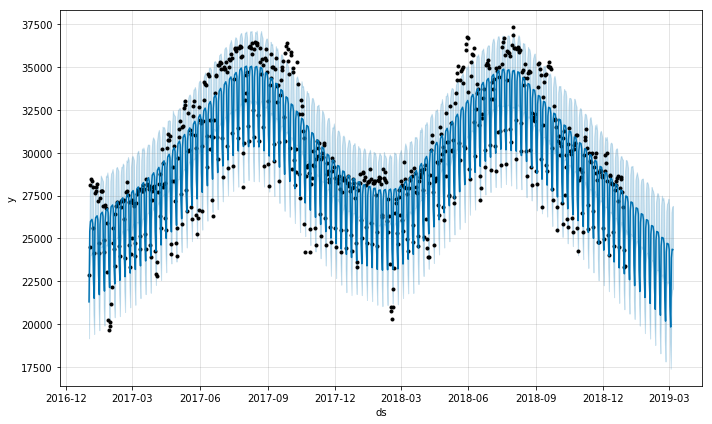

In [6]:
fig1 = m.plot(forecast)

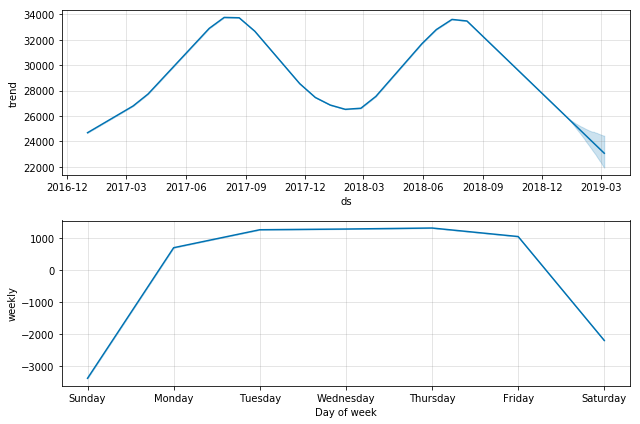

In [7]:
fig2 = m.plot_components(forecast)

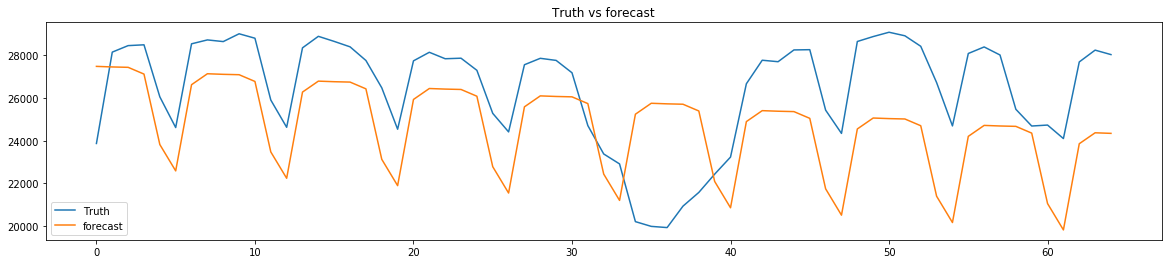

In [8]:
#test = forecast['yhat'].tail(31) + 1500

plt.figure(figsize=(20,4))
x_axis = range(0, 65)
plt.plot(x_axis, data_2019.head(65)['peak_load'], '-')
plt.plot(x_axis, forecast['yhat'].tail(65), '-')
plt.title('Truth vs forecast')
plt.legend(['Truth', 'forecast'])
plt.show()